<img src="../images/audreyMarbMD2.jpg" style="float: left; margin: 15px;" width="75">

# Expoloratory Data Analysis

---

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows=100
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
np.random.seed(42)

In [19]:
df_scrape = pd.read_csv('./data/Final_Dataset.csv', usecols=['post_title', 'subreddit_name', 'url'])

In [20]:
df_scrape.shape

(1729, 3)

In [21]:
df_scrape.isnull().sum()

post_title        0
subreddit_name    0
url               0
dtype: int64

In [22]:
df_scrape.head()

,post_title,subreddit_name,url
0,Thread for Useful Links,esist,https://www.reddit.com/r/esist/comments/5rid3d...
1,"AOC: “He can stay, he can go. He can be impeac...",esist,https://www.reddit.com/r/esist/comments/b4zzv5...
2,Puerto Rico did NOT get 91 billion dollars in ...,esist,https://twitter.com/sunny/status/1113069327886...
3,AOC : “If one truly cared about reducing immig...,esist,https://www.reddit.com/r/esist/comments/b84gpb...
4,"Ocasio-Cortez: ""Hey Rep. Cheney, I see from yo...",esist,https://twitter.com/AOC/status/111282891022643...


# Preprocessing

In [23]:
df_scrape['subred_binom'] = df_scrape['subreddit_name'].map(lambda each: 1 if each == 'The_Donald' else 0) 

In [24]:
df = df_scrape[['subred_binom', 'post_title']]
df.head()

,subred_binom,post_title
0,0,Thread for Useful Links
1,0,"AOC: “He can stay, he can go. He can be impeac..."
2,0,Puerto Rico did NOT get 91 billion dollars in ...
3,0,AOC : “If one truly cared about reducing immig...
4,0,"Ocasio-Cortez: ""Hey Rep. Cheney, I see from yo..."


### Saving Data to File

In [25]:
df.to_csv("./data/clean_eda_model_data")

---

# EDA

## Questions I am interested in answering?

> * What are the trends and most popular subjects posted to each subreddit?
> * What's the most common word found in each subreddit?
> * What words do the subreddits have in common? Are there any surprises here?
> * What are the unique words used by one subreddit that are not used by the other?
> * What's the distribution of sentiment? Who uses more negative words, and who uses more positive words?
> * Length of titles and words used -- does one subreddit use longer words on average than the other?
> * Can we verify the facts through a quantitative model?
> * Is there a way to capture the complexity of an argument and the vocabulary associated?

In [26]:
df.shape

(1729, 2)

In [27]:
# baseline rate is 56.51% for the model

df['subred_binom'].value_counts()
# df['subred_binom'].value_counts(normalize=True)

1    977
0    752
Name: subred_binom, dtype: int64

- Baseline rate is 56.51% for the model

### Train, Test, Split & Count Vectorize the Data

In [28]:
# Define features and TTS
X = df['post_title']
y = df['subred_binom']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42)

# Initialize the Count Vectorizer
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df= 2)

# Fit and transform the Count Vectorizer to corpus
cv.fit(X_train)

X_train_cv = cv.transform(X_train)

In [29]:
text_df = pd.DataFrame(X_train_cv.todense(),
                      columns = cv.get_feature_names())  

In [30]:
# Replace the binary values with the string name of the subreddits

text_df['sub_name'] = y_train.map({0: 'esist', 1: 'The_Donald'}).values

### Exploring the EDA Questions Above

In [31]:
# Most words used overall between both subreddits

text_df.sum()[:-1].sort_values(ascending= False)[:25]

trump        309
just          80
new           78
biden         67
people        66
mueller       63
president     62
report        59
democrats     58
house         58
says          55
news          54
joe           53
white         51
like          44
climate       40
2020          38
amp           37
don           36
years         36
time          36
security      34
border        33
campaign      32
cnn           29
dtype: object

In [32]:
# Top 10 words used by esist
text_df.groupby('sub_name').sum().T.sort_values(by='esist', ascending= False)[:10]

sub_name,The_Donald,esist
trump,83,226
new,20,58
mueller,22,41
house,17,41
people,25,41
report,21,38
climate,4,36
president,28,34
white,22,29
says,26,29


In [33]:
# Top 10 words used by The_Donald
text_df.groupby('sub_name').sum().T.sort_values(by='The_Donald', ascending= False)[:10]

sub_name,The_Donald,esist
trump,83,226
biden,66,1
just,52,28
joe,52,1
democrats,33,25
like,29,15
border,28,5
president,28,34
news,27,27
joe biden,27,0


In [34]:
text_df.groupby('sub_name').sum()[['subpoena', 'emails', 'emails', 'benghazi', 'nunes', 'nadler', 'schiff', 'barr', 'impeach', 'russia', 'indictments', 'obama', 'clinton', 'donald', 'don jr', 'trump jr', 'jr', 'ivanka']]

,subpoena,emails,emails,benghazi,nunes,nadler,schiff,barr,impeach,russia,indictments,obama,clinton,donald,don jr,trump jr,jr,ivanka
sub_name,,,,,,,,,,,,,,,,,,
The_Donald,3,2,2,1,2,4,6,1,3,12,0,12,13,7,1,1,2,0
esist,1,0,0,1,0,1,7,13,1,10,2,5,1,18,1,3,4,2


In [35]:
text_df.groupby('sub_name').sum().T.sort_values(by='esist', ascending = False)[:75]

sub_name,The_Donald,esist
trump,83,226
new,20,58
mueller,22,41
house,17,41
people,25,41
report,21,38
climate,4,36
president,28,34
white,22,29
says,26,29


In [36]:
text_df.groupby('sub_name').sum().T.sort_values(by='The_Donald', ascending = False)[:75]

sub_name,The_Donald,esist
trump,83,226
biden,66,1
just,52,28
joe,52,1
democrats,33,25
like,29,15
border,28,5
president,28,34
news,27,27
joe biden,27,0


In [37]:
grouped = text_df.groupby('sub_name').sum().T
grouped

sub_name,The_Donald,esist
000,13,15
000 000,2,1
000 14,0,2
000 mueller,2,0
000 year,0,2
10,3,3
100,3,4
100 000,2,0
11,1,1
12,1,2


In [38]:
grouped[(grouped['The_Donald'] == 0) & (grouped['esist'] >= 10)]

sub_name,The_Donald,esist
aoc,0,16
cohen,0,28
cortez,0,15
manafort,0,15
mcconnell,0,12
michael cohen,0,11
new zealand,0,14
ocasio,0,14
ocasio cortez,0,14
paul,0,14


In [39]:
grouped[(grouped['esist'] == 0) & (grouped['The_Donald'] >= 10)]

sub_name,The_Donald,esist
abortion,10,0
april fools,11,0
avocados,13,0
fools,12,0
joe biden,27,0
uncle,10,0
uncle joe,10,0
unplanned,15,0


# Plots and Data Visualizations

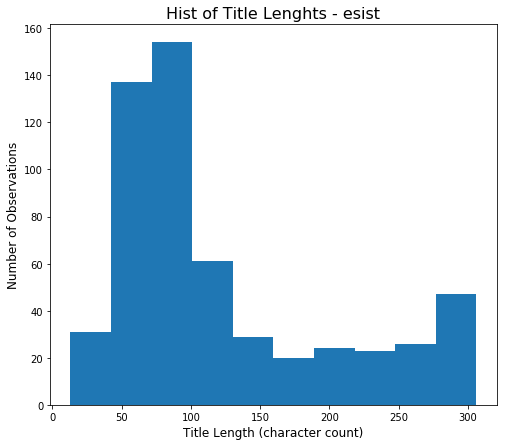

In [84]:
lengths = [len(each) for each in X_train]

length_df = pd.DataFrame({
    'title_length': lengths,
    'sub_name': y_train
})

length_df[length_df['sub_name'] == 0]['title_length'].hist(grid= False, figsize = (8,7))
plt.xlabel('Title Length (character count)', fontsize= 12)
plt.ylabel('Number of Observations', fontsize= 12)
plt.title('Hist of Title Lenghts - esist', fontsize= 16);
plt.savefig('./images/esist_hist')

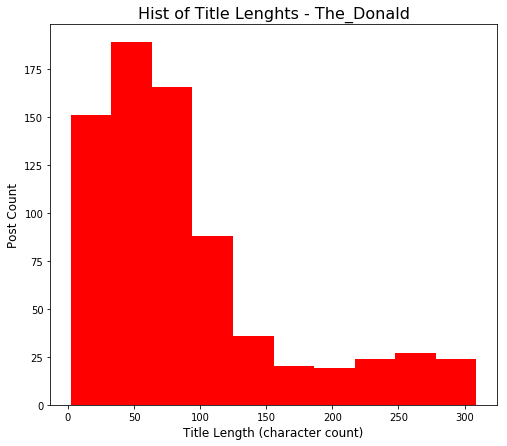

In [83]:
lengths = [len(each) for each in X_train]

length_df = pd.DataFrame({
    'title_length': lengths,
    'sub_name': y_train
})

length_df[length_df['sub_name'] == 1]['title_length'].hist(grid= False, figsize = (8,7), color='red')
plt.xlabel('Title Length (character count)', fontsize= 12)
plt.ylabel('Post Count', fontsize= 12)
plt.title('Hist of Title Lenghts - The_Donald', fontsize= 16);
plt.savefig('./images/The_Donald_hist')

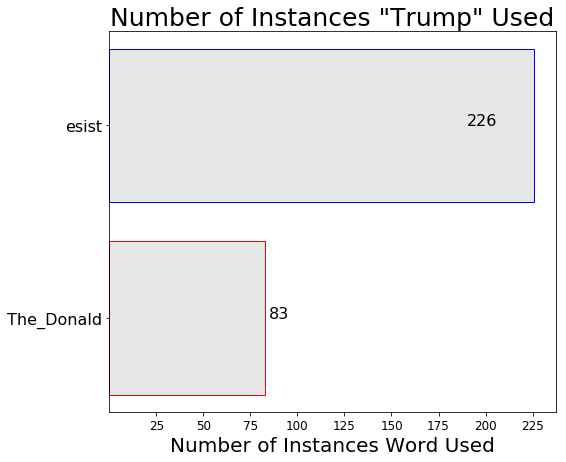

In [42]:
plt.figure(figsize= (8,7))
plt.barh(['The_Donald', 'esist'], [83, 226], color=(0.1, 0.1, 0.1, 0.1),  edgecolor=['red','blue'], );
plt.title('Number of Instances "Trump" Used', fontsize= 25)
plt.xlabel('Number of Instances Word Used', fontsize=20)
plt.yticks(fontsize= 16)
plt.xticks([25, 50, 75, 100, 125, 150, 175, 200, 225], fontsize=12)
plt.annotate('83', xy=(85, 'The_Donald'), fontsize= 16)
plt.annotate('226', xy=(190, 'esist'), fontsize= 16)
plt.savefig('./images/bar_word_trump.png')
plt.show();

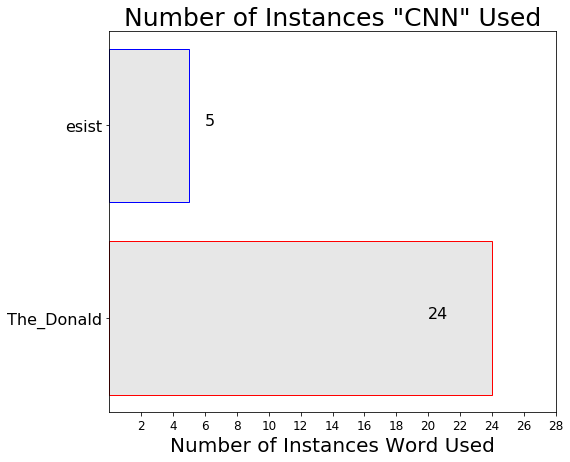

In [91]:
plt.figure(figsize= (8,7))
plt.barh(['The_Donald', 'esist'], [24, 5], color=(0.1, 0.1, 0.1, 0.1),  edgecolor=['red','blue'], );
plt.title('Number of Instances "CNN" Used', fontsize= 25)
plt.xlabel('Number of Instances Word Used', fontsize=20)
plt.yticks(fontsize= 16)
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28], fontsize=12)
plt.annotate('5', xy=(6, 'esist'), fontsize= 16)
plt.annotate('24', xy=(20, 'The_Donald'), fontsize= 16)
plt.savefig('./images/bar_word_CNN.png')
plt.show();

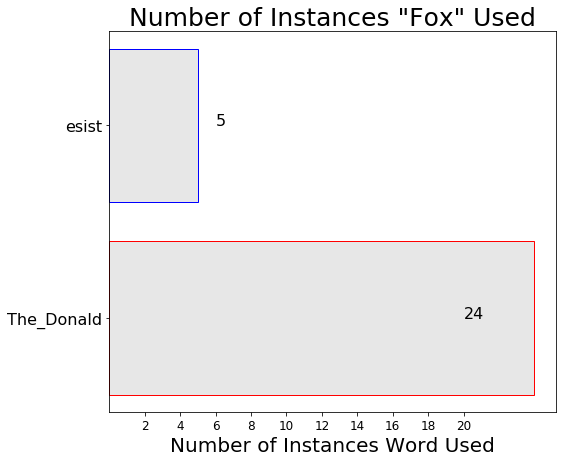

In [86]:
plt.figure(figsize= (8,7))
plt.barh(['The_Donald', 'esist'], [24, 5], color=(0.1, 0.1, 0.1, 0.1),  edgecolor=['red','blue'], );
plt.title('Number of Instances "Fox" Used', fontsize= 25)
plt.xlabel('Number of Instances Word Used', fontsize=20)
plt.yticks(fontsize= 16)
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], fontsize=12)
plt.annotate('5', xy=(6, 'esist'), fontsize= 16)
plt.annotate('24', xy=(20, 'The_Donald'), fontsize= 16)
plt.savefig('./images/bar_word_fox.png')
plt.show();

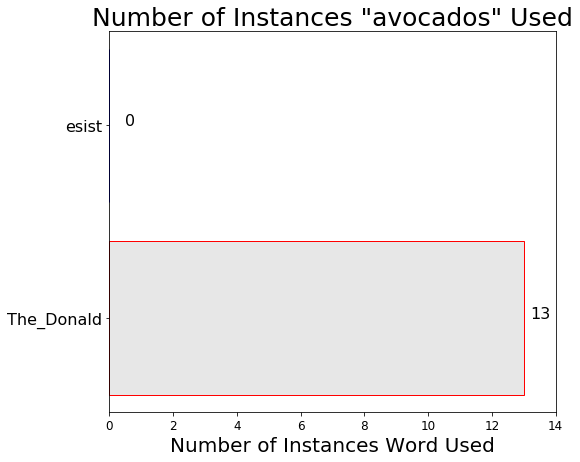

In [45]:
plt.figure(figsize= (8,7))
plt.barh(['The_Donald', 'esist'], [13, 0], color=(0.1, 0.1, 0.1, 0.1),  edgecolor=['red','blue'], );
plt.title('Number of Instances "avocados" Used', fontsize= 25)
plt.xlabel('Number of Instances Word Used', fontsize=20)
plt.yticks(fontsize= 16)
plt.xticks(range(16)[::2], fontsize=12)
plt.annotate('0', xy=(0.5, 'esist'), fontsize= 16)
plt.annotate('13', xy=(13.2, 'The_Donald'), fontsize= 16)
plt.savefig('./images/bar_word_avocados.png')
plt.show();

**The_Donald mentioned frequently:**
- trump 83 | 226
- joe 52 | 1; Biden 66 | 1; Joe Biden 27 | 0 
- creepy 21 | 1 (Joe Biden)
- cnn 24 | 5
- puerto rico 14 | 5
- avocados 13 | 0
- border 28 | 5
- unplanned 15 | 0 
- abortion 10 | 0 
- ilhan omar 11 | 15
- Russia 12 | 10
- Obama 12 | 5
- collusion 12 | 5
- fake 12 | 3
- fools 12 | 0
- omar 13
- left 13 | 2
- puerto rico 13
- life 10 | 7
- mueller 22 | 41
- mueller report 

**esist mentioned frequently:**
- trump 226
- mueller 41 | 22
- report 38 | 21
- climate 38 | 4
- cohen 28 | 0
- deal 22 | 3
- change 22 | 7
- climate change 19 | 3
- fox 17 | 2
- aoc 16 | 0
- manafort 15 | 0; paul 14 | 0
- new zealand 14 | 0
- barr 13 | 1
- michael cohen 11 | 0
- mcconnell 12 | 0 
- black 11 | 2
- border 28 | 5